# Tutorial 6: Human brain M1 cells
We localized human brain primary motor cortex (M1) scRNA-seq dataset on huamn dorsolateral prefrontal cortex (DLPFC) 10x Visium ST dataset section 151673 to recover the laminor organization by STABox-STAlocator. The raw ST dataset is available at https://github.com/LieberInstitute/spatialLIBD. The raw scRNA-seq dataset is available at https://portal.brain-map.org/atlases-and-data/rnaseq/human-m1-10x. The down-sampled barcodes and anndata object of down-sampled scRNA-seq dataset can be downloaded from https://drive.google.com/drive/folders/1jVJsrXb6a4Hs4UmnDCTxp2OKqcRu3nRZ.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.sparse as sp

In [8]:
from stabox.model import STALocator

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [10]:
st_data_path = 'D:/Users/lqlu/work/Data/STABox_Data/10X_Data/DLPFC/151673'

In [11]:
## Read the expression data as anndata object.
adata_ST = sc.read_visium(path=st_data_path, count_file='151673_filtered_feature_bc_matrix.h5')
adata_ST.var_names_make_unique()

## Read the manual annotation.
Ann_df = pd.read_csv(os.path.join(st_data_path, '151673_truth.txt'), sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']

## Add the annotation to the expression data, and remove spots without annotation.
adata_ST.obs['layer'] = Ann_df.loc[adata_ST.obs_names, 'Ground Truth']
adata_ST.obs['celltype'] = Ann_df.loc[adata_ST.obs_names, 'Ground Truth']
adata_ST.uns['layer_colors']=['#1f77b4', '#ff7f0e', '#49b192', '#d62728', '#aa40fc', '#8c564b', '#e377c2']
adata_ST.uns['celltype_colors']=['#1f77b4', '#ff7f0e', '#49b192', '#d62728', '#aa40fc', '#8c564b', '#e377c2']
adata_ST=adata_ST[adata_ST.obs['layer'].isna()==False]

In [12]:
adata_ST

View of AnnData object with n_obs × n_vars = 3611 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'layer', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'layer_colors', 'celltype_colors'
    obsm: 'spatial'

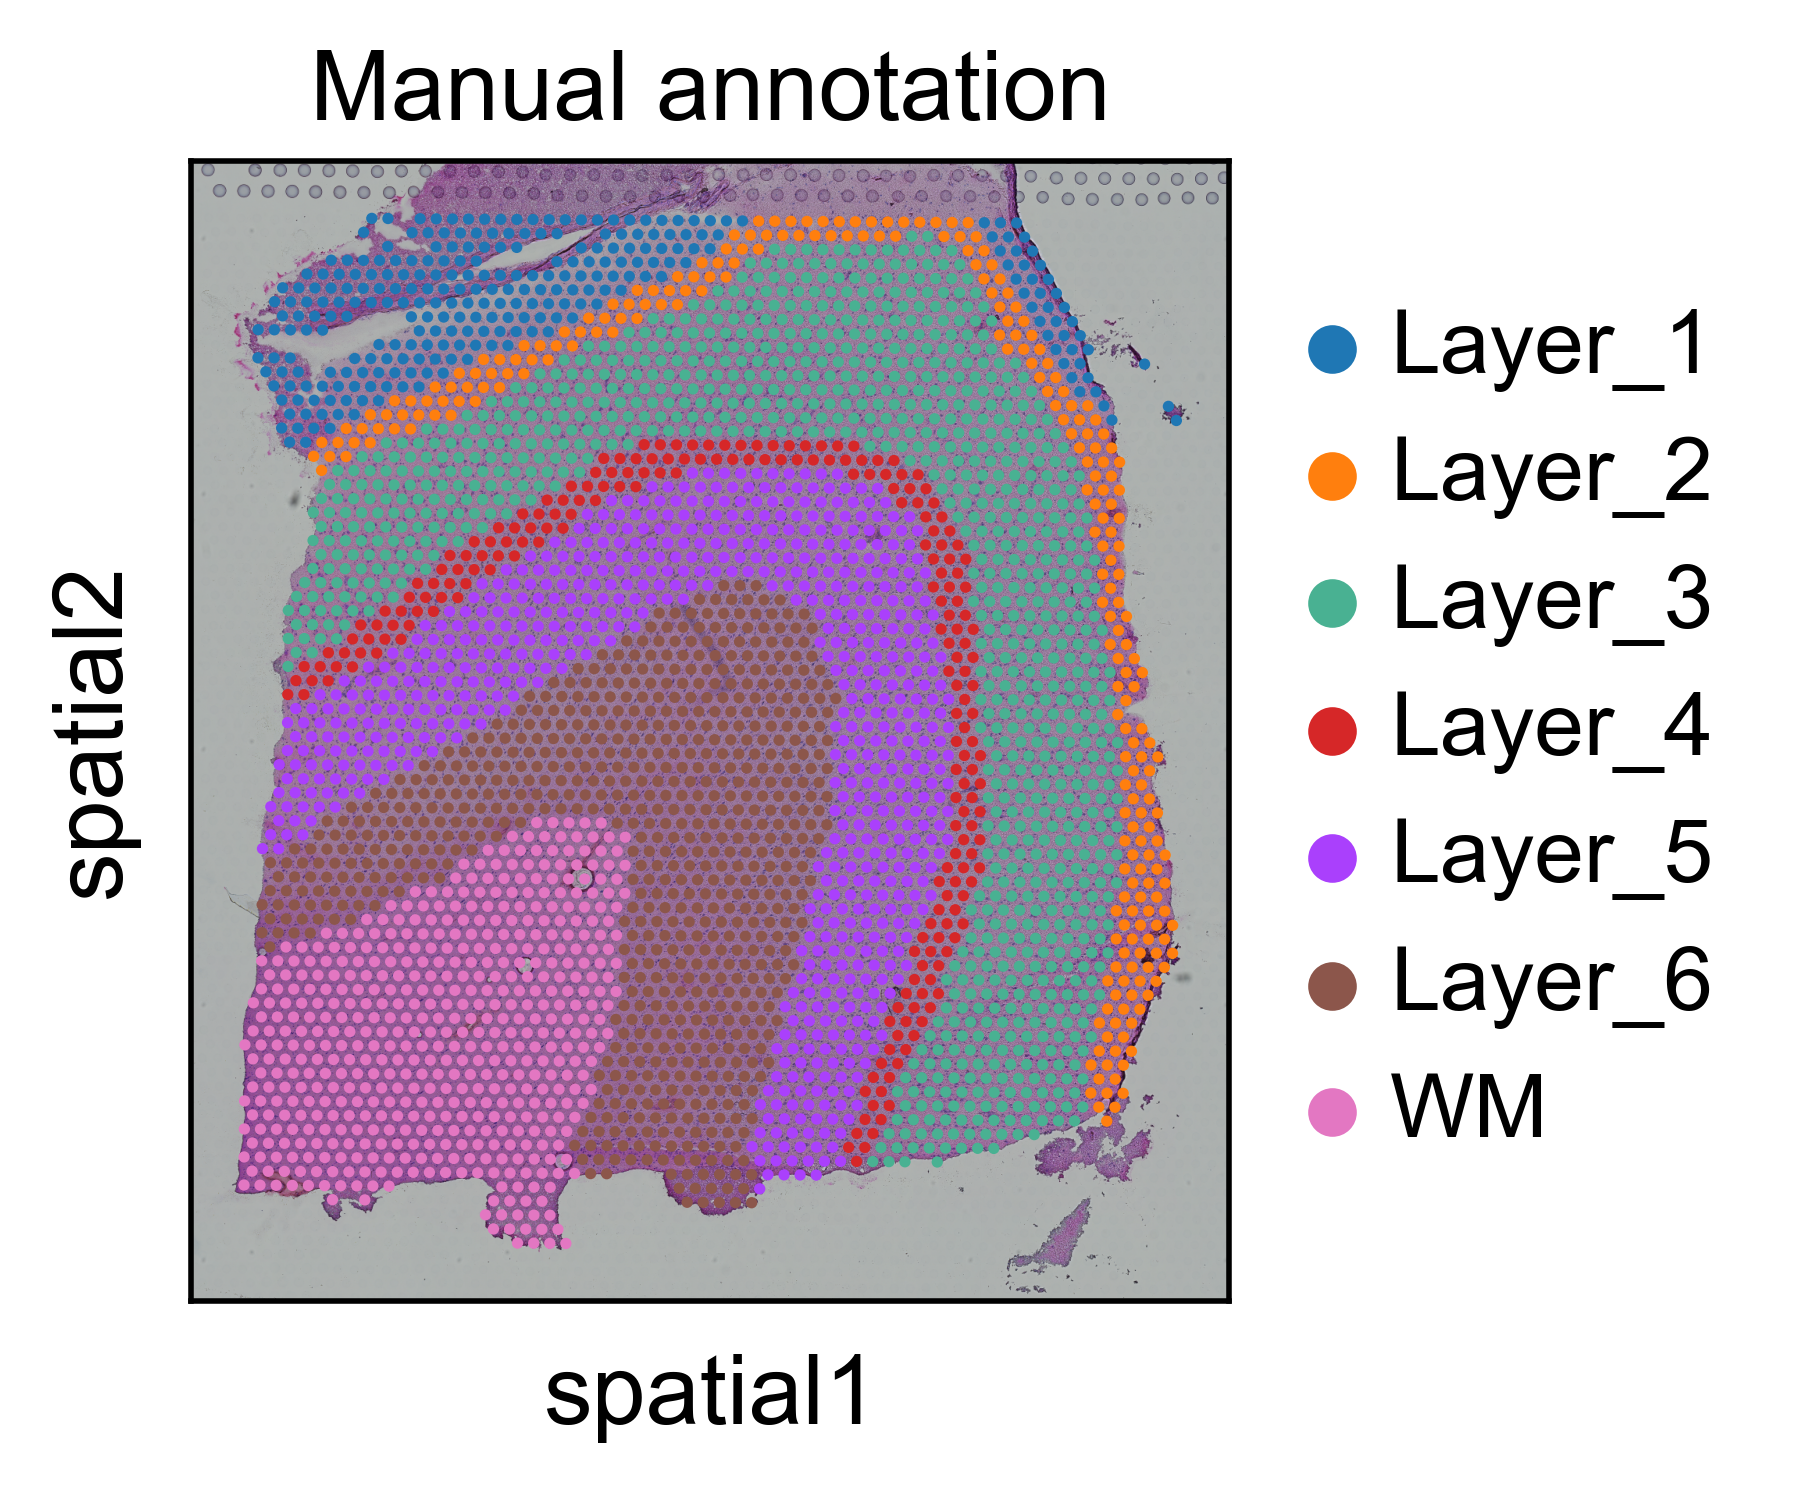

In [14]:
sc.set_figure_params(dpi=250, figsize=(3, 3))
sc.pl.spatial(adata_ST, img_key="hires", color="celltype", title="Manual annotation")

In [15]:
path = 'D:/Users/lqlu/work/Data/STABox_Data/10X_Data/DLPFC/Fig3_brain_cortex/M1_scRNAseq_down_1w.h5ad'

In [16]:
adata_sc = sc.read(path)
adata_sc

AnnData object with n_obs × n_vars = 10000 × 50281
    obs: 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order', 'class_label', 'class_color', 'class_order', 'subclass_label', 'subclass_color', 'subclass_order', 'donor_sex_label', 'donor_sex_color', 'donor_sex_order', 'region_label', 'region_color', 'region_order', 'cortical_layer_label', 'cortical_layer_color', 'cortical_layer_order', 'cell_type_accession_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_alias_label', 'cell_type_alias_color', 'cell_type_alias_order', 'cell_type_alt_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_designation_label', 'cell_type_designation_color', 'cell_type_designation_order', 'external_donor_name_label', 'external_donor_name_color', 'external_donor_name_order', 'specimen_type', 'full_genotype_label', 'outlier_type', 'celltype'

In [17]:
experiment_path="D:/Users/lqlu/work/Codes/work/STABox/src/stabox/result/T2_M1"
if not os.path.exists(experiment_path):
    os.makedirs(experiment_path)

In [18]:
model = STALocator(resolution="low", batch_size=200, train_epoch=10000, cut_steps=0.5, 
                               sf_coord = 6000, rad_cutoff=140/np.sqrt(3), 
                               seed=123, lambdacos = 2, lambdaSWD = 5, lambdalat = 10, lambdarec = 0.1,
                               model_path = f"{experiment_path}/models", data_path = f"{experiment_path}/data", result_path = f"{experiment_path}/results", 
                               ot=False, device="cuda:0")

In [19]:
model.preprocess(adata_sc, adata_ST)

Finding highly variable genes...
Normalizing and scaling...
Dimensionality reduction via PCA...


In [20]:
model.train()

Begining time:  Thu May 23 15:36:32 2024
step 0, total_loss=488.3397, loss_D=6.4160, loss_GAN=6.7112, loss_AE=25.0519, loss_cos=2.0275, loss_LA=19.4571, loss_SWD=6.4967
step 500, total_loss=17.9322, loss_D=2.0732, loss_GAN=4.1958, loss_AE=0.8331, loss_cos=1.2285, loss_LA=0.1700, loss_SWD=0.2498
step 1000, total_loss=16.7101, loss_D=1.7945, loss_GAN=3.8137, loss_AE=0.9063, loss_cos=1.1296, loss_LA=0.0961, loss_SWD=0.1226
step 1500, total_loss=13.7759, loss_D=1.8430, loss_GAN=3.8915, loss_AE=0.6330, loss_cos=1.0919, loss_LA=0.0752, loss_SWD=0.1237
step 2000, total_loss=13.6980, loss_D=1.9729, loss_GAN=4.0024, loss_AE=0.6355, loss_cos=1.0735, loss_LA=0.0677, loss_SWD=0.1033
step 2500, total_loss=13.0373, loss_D=1.6771, loss_GAN=4.0562, loss_AE=0.5892, loss_cos=1.0396, loss_LA=0.0561, loss_SWD=0.0897
step 3000, total_loss=12.7545, loss_D=2.0382, loss_GAN=3.7074, loss_AE=0.6101, loss_cos=1.0371, loss_LA=0.0552, loss_SWD=0.0641
step 3500, total_loss=12.4183, loss_D=1.7602, loss_GAN=3.8569, l

In [21]:
model.eval()

Localized scRNA-seq dataset has been saved!


In [22]:
adata_total = model.adata_total
adata_sc = model.adata_A_input
adata_ST = model.adata_B_input
adata_sc_keep = model.adata_A_keep

## Visualization of the localization results

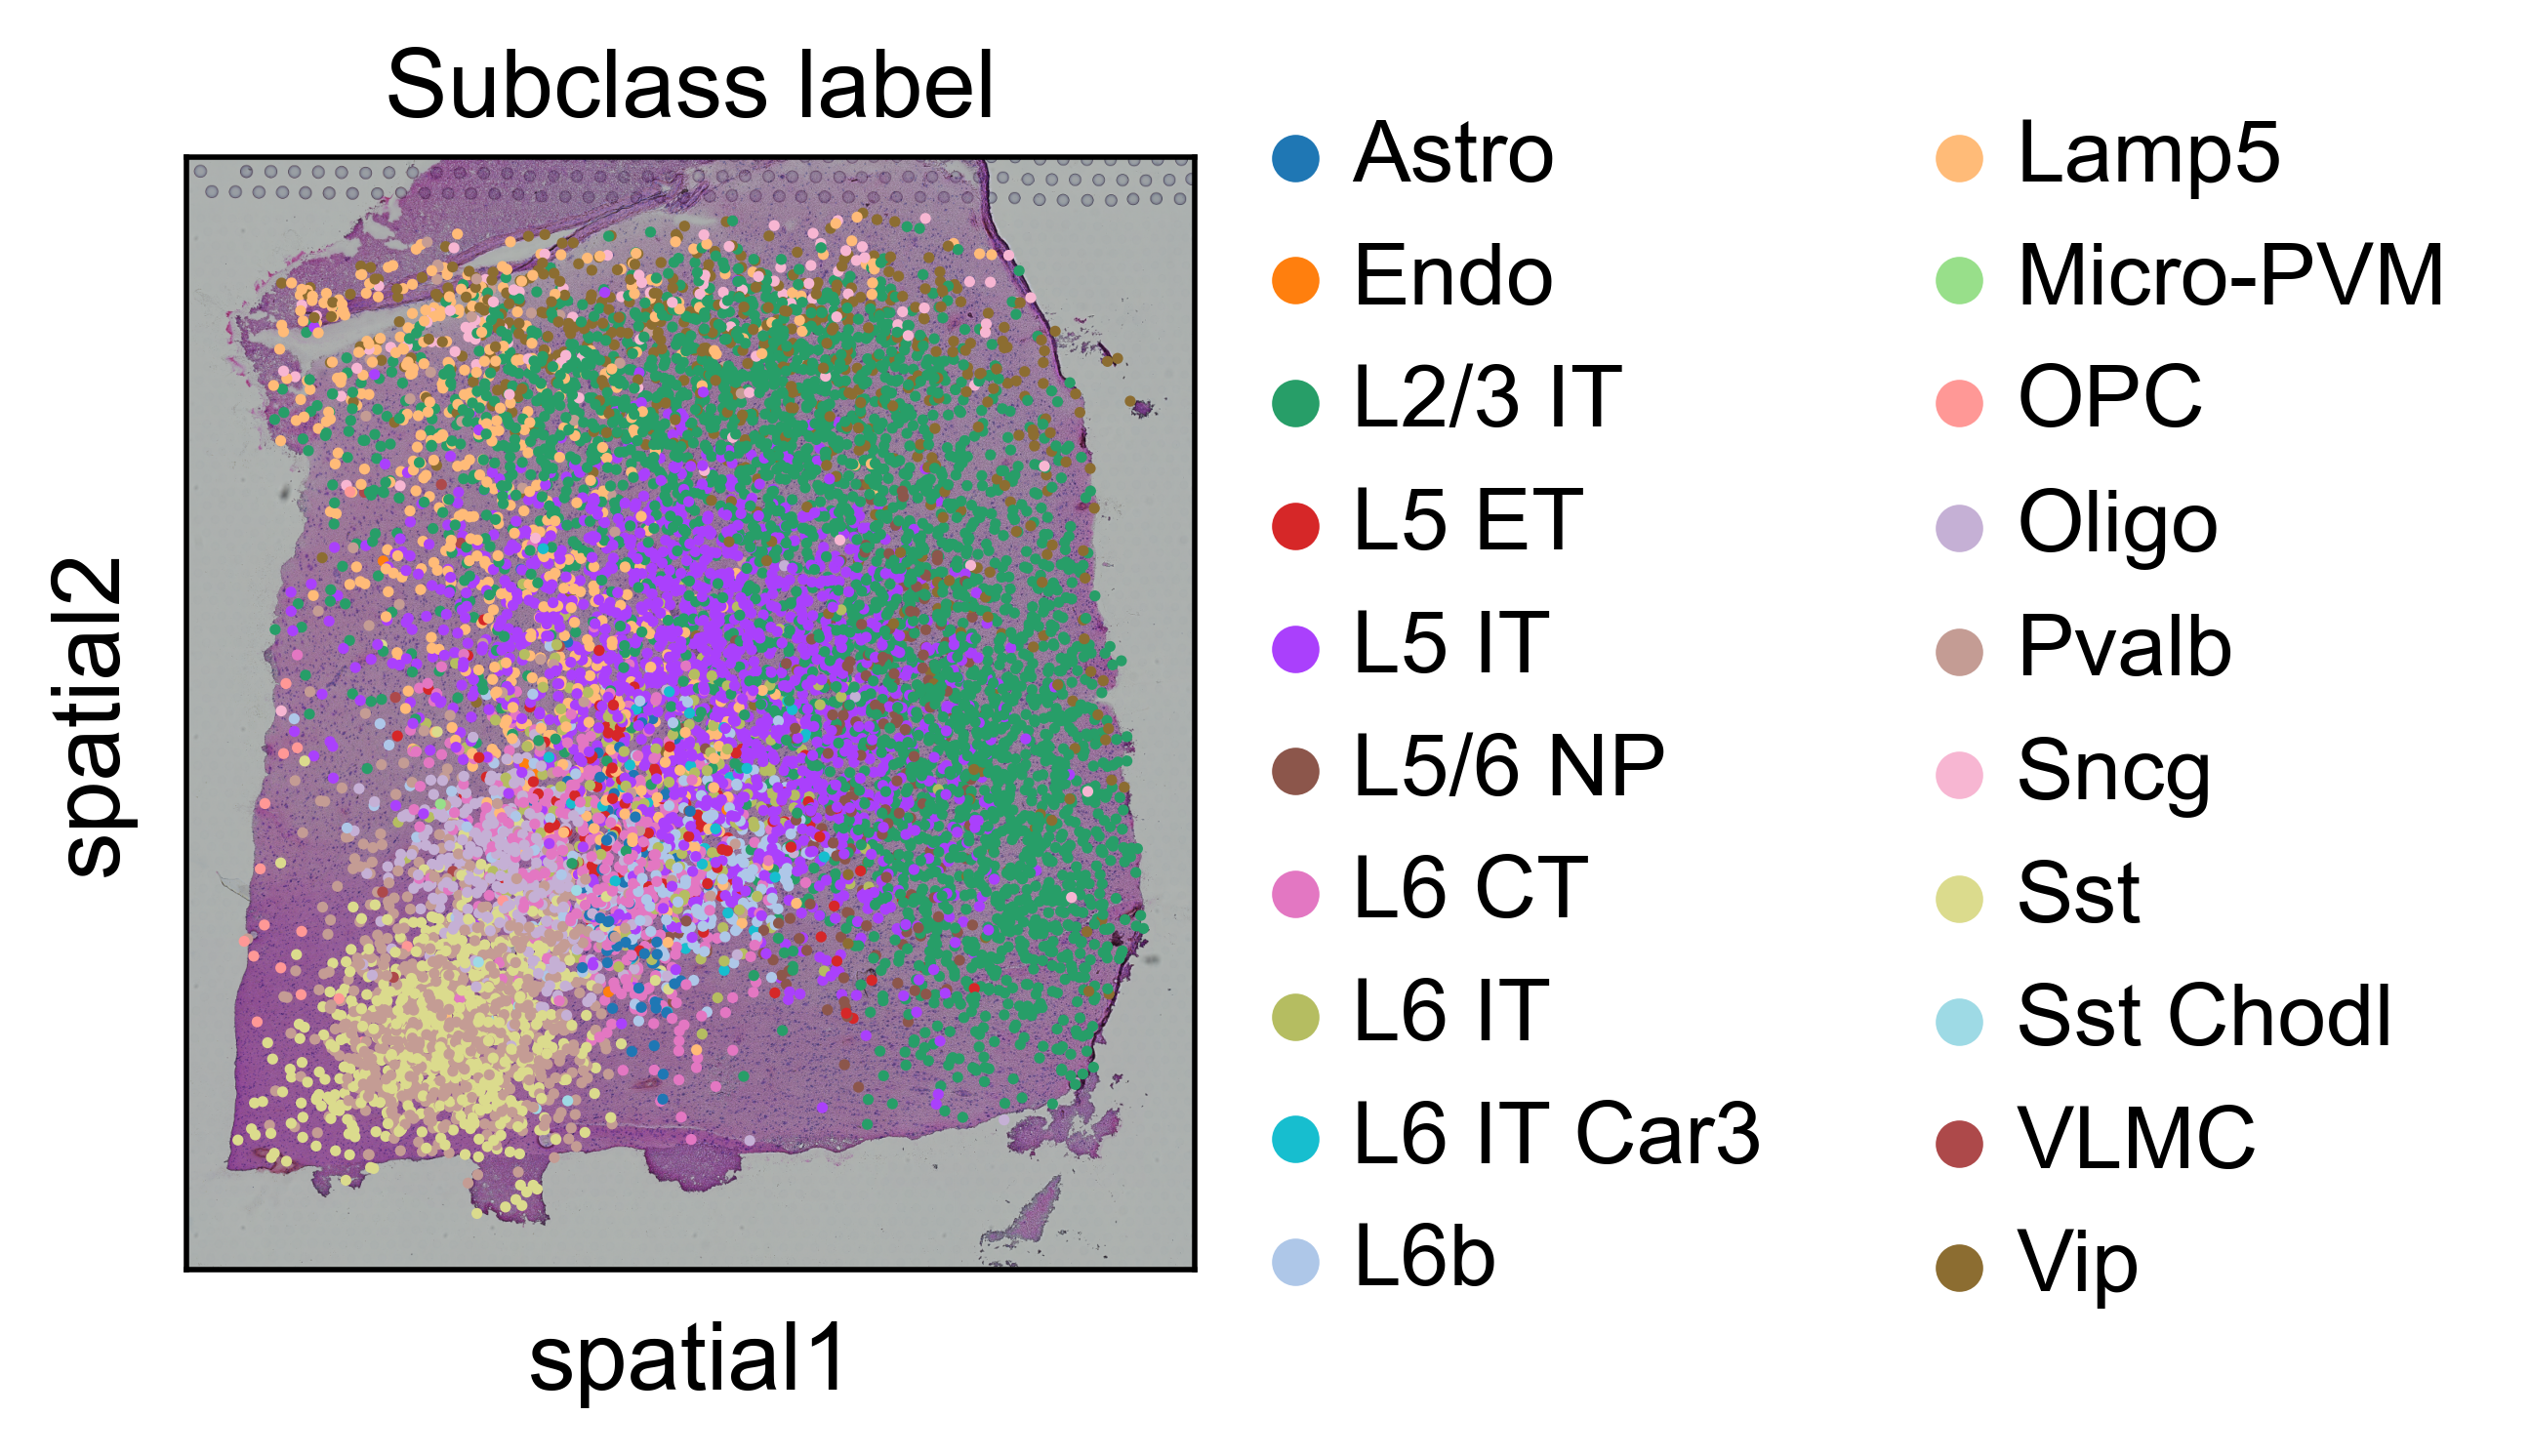

In [23]:
sc.set_figure_params(dpi=250, figsize=(3, 3))
sc.pl.spatial(adata_sc_keep, img_key="hires", color="celltype", title="Subclass label")

## Disatance to White Matter (WM)

In [24]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [25]:
select_pop=['L2/3 IT','L5 ET','L5 IT','L5/6 NP','L6 CT','L6 IT','L6 IT Car3','L6b','Oligo']
select_layer=['WM']

In [26]:
# The distance of each cell in the selected population to the nearest spot in the WM is calculated here.
cell_map_df_1=pd.DataFrame(adata_sc_keep.obsm["loc"], index=adata_sc_keep.obs.index, columns=["coor_x","coor_y"])
cell_map_df_1["label"]=adata_sc_keep.obs["celltype"].astype("str")
cell_map_df_1=cell_map_df_1[cell_map_df_1["label"].isin(select_pop)]
cell_map_df_2=pd.DataFrame(adata_ST.obsm["spatial"], index=adata_ST.obs.index, columns=["coor_x","coor_y"])
cell_map_df_2["label"]=adata_ST.obs["celltype"].astype("str")
cell_map_df_2=cell_map_df_2[cell_map_df_2["label"].isin(select_layer)]
cell_map_df=pd.concat([cell_map_df_1,cell_map_df_2], axis=0)
grouped = cell_map_df.groupby('label')
ref_samples = grouped.get_group("WM")[['coor_x', 'coor_y']].values
min_distances = {}
for label, group in grouped:
    if label != "WM":
        samples = group[['coor_x', 'coor_y']].values
        distances = cdist(samples, ref_samples)
        min_dist = np.min(distances, axis=1)
        min_distances[label] = min_dist
sorted_distances = sorted(min_distances.items(), key=lambda x: np.median(x[1]))

In [27]:
sc_celltype_color=adata_sc_keep.uns["celltype_colors"]
sc_celltype_color=pd.DataFrame(sc_celltype_color, index=adata_sc_keep.obs["celltype"].cat.categories, columns=["color"])
#sc_celltype_color.to_csv("D:/Users/sli/Work/STASITE/human_brain_10x_DLPFC/sec_73_M1/dist_WM/sc_celltype_color.csv")

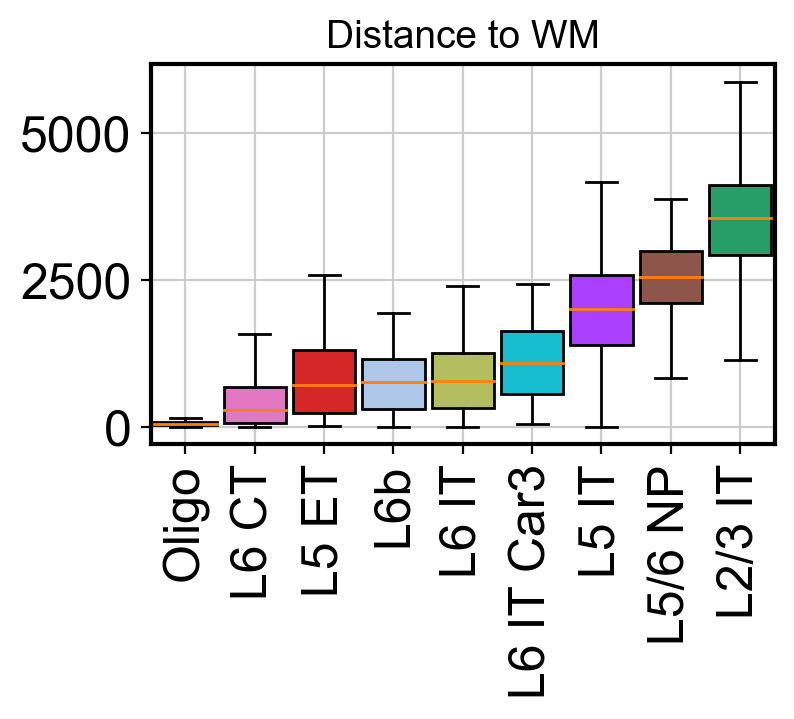

In [28]:
sc.set_figure_params(dpi=100, figsize=(4, 2.5))
labels = [item[0] for item in sorted_distances]
distances = [item[1] for item in sorted_distances]
fig, ax = plt.subplots()
boxplot = ax.boxplot(distances, sym='k+', showfliers=False, widths=0.9, vert=True, patch_artist=True)
colors = sc_celltype_color.loc[labels,"color"]
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
plt.xticks(range(1, len(labels) + 1), labels, rotation=90, ha='center', fontsize=18)
plt.yticks([0,2500,5000],fontsize=18)
plt.title("Distance to WM")
#plt.savefig("D:/Users/sli/Work/STASITE/github/figures/dist_WM_M1.png", bbox_inches='tight')
plt.show()